Consigna 2

In [4]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import datetime

In [5]:
"""
Sacar un insight de los resultados electorales nacionales.
Hacer un informe sobre el resultado electoral de alguno de los candidatos nacionales 
que pueda posicionar mejor al candidato en cuestión de cara a las elecciones.

Bajar los datos del recuento parcial y encontrar la cartografía de CABA de los circuitos electorales. 
Matchear uno con el otro. Habrá puntos extra para quien use la información del Censo.
"""

'\nSacar un insight de los resultados electorales nacionales.\nHacer un informe sobre el resultado electoral de alguno de los candidatos nacionales \nque pueda posicionar mejor al candidato en cuestión de cara a las elecciones.\n\nBajar los datos del recuento parcial y encontrar la cartografía de CABA de los circuitos electorales. \nMatchear uno con el otro. Habrá puntos extra para quien use la información del Censo.\n'

In [6]:
import pandas as pd
df = pd.read_csv(
    '../utils/ResultadosElectorales_2023.csv',     # file path
    delimiter=',',       # delimitador ',',';','|','\t'
    header=0,            # número de fila como nombre de columna
    names=None,          # nombre de las columnas (ojo con header)
    index_col=0,         # que col es el índice
    usecols=None,        # que col usar. Ej: [0, 1, 2], ['foo', 'bar', 'baz']
    dtype=None,          # Tipo de col {'a': np.int32, 'b': str} 
    skiprows=None,       # saltear filas al inicio
    skipfooter=0,        # saltear filas al final
    nrows=None,          # n de filas a leer
    decimal='.',         # separador de decimal. Ej: ',' para EU dat
    quotechar='"',       # char para reconocer str
    low_memory=False
    #encoding=None,      # archivos con tilde y ñ por lo general utilizan "utf-8" etc 
)

df

,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
año,,,,,,,,,,,,,,,,,,,,,
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,00058,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,0,NaN,0.0,NaN,COMANDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,00058,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10802,UNION POR LA PATRIA,NaN,NaN,POSITIVO,40
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,00058,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10803,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,22


In [7]:
#Conocemos las entradas que tenemos en el data frame que importamos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5868102 entries, 2023 to 2023
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   eleccion_tipo             object 
 1   recuento_tipo             object 
 2   padron_tipo               object 
 3   distrito_id               int64  
 4   distrito_nombre           object 
 5   seccionprovincial_id      int64  
 6   seccionprovincial_nombre  object 
 7   seccion_id                int64  
 8   seccion_nombre            object 
 9   circuito_id               object 
 10  circuito_nombre           object 
 11  mesa_id                   int64  
 12  mesa_tipo                 object 
 13  mesa_electores            int64  
 14  cargo_id                  int64  
 15  cargo_nombre              object 
 16  agrupacion_id             int64  
 17  agrupacion_nombre         object 
 18  lista_numero              float64
 19  lista_nombre              object 
 20  votos_tipo                obj

<Axes: ylabel='count'>

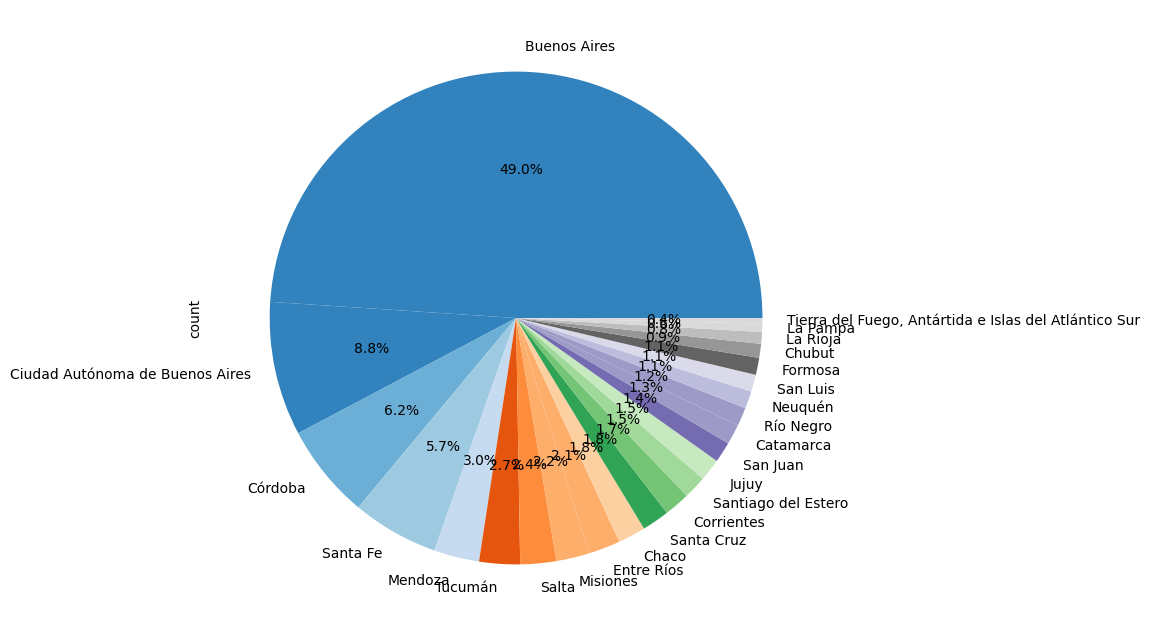

In [8]:
df["distrito_nombre"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="tab20c", figsize=(10,8))

In [9]:
#La idea es utilizar solo los datos de CABA, por lo que tendremos que eliminar todos los otros distritos
#Crearemos una para CABA seleccionando solo las que cumplan con el requisito, podemos hacerlo con el nombre o el id
CABA = df.loc[df["distrito_nombre"]=="Ciudad Autónoma de Buenos Aires"]
CABA

,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
año,,,,,,,,,,,,,,,,,,,,,
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,00058,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,0,NaN,0.0,NaN,COMANDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,00058,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10802,UNION POR LA PATRIA,NaN,NaN,POSITIVO,40
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,5,Comuna 05,00058,...,EXTRANJEROS,360,12,DIPUTADOS/AS DE LA CIUDAD AUTONOMA,10803,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,22


In [10]:
#Ahora crearemos otra donde solo guardemos los datos para presidente y vice
CABA_nac = CABA.loc[CABA["cargo_nombre"]=="PRESIDENTE Y VICE"]
CABA_nac

,eleccion_tipo,recuento_tipo,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,seccion_id,seccion_nombre,circuito_id,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
año,,,,,,,,,,,,,,,,,,,,,
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,NULO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,IMPUGNADO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,RECURRIDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,343,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,COMANDO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00018,...,NATIVOS,349,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,13,Comuna 13,00135,...,NATIVOS,347,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,EN BLANCO,0
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,6,Comuna 06,00068,...,NATIVOS,350,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,EN BLANCO,6
2023,GENERAL,PROVISORIO,NORMAL,1,Ciudad Autónoma de Buenos Aires,0,NaN,1,Comuna 01,00015,...,NATIVOS,344,1,PRESIDENTE Y VICE,0,NaN,0.0,NaN,EN BLANCO,7


agrupacion_nombre
JUNTOS POR EL CAMBIO                              767367
UNION POR LA PATRIA                               600832
LA LIBERTAD AVANZA                                369424
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD     66145
HACEMOS POR NUESTRO PAIS                           57607
Name: votos_cantidad, dtype: int64
agrupacion_nombre
JUNTOS POR EL CAMBIO                              41.225814
UNION POR LA PATRIA                               32.278934
LA LIBERTAD AVANZA                                19.846834
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD     3.553556
HACEMOS POR NUESTRO PAIS                           3.094863
Name: votos_cantidad, dtype: float64


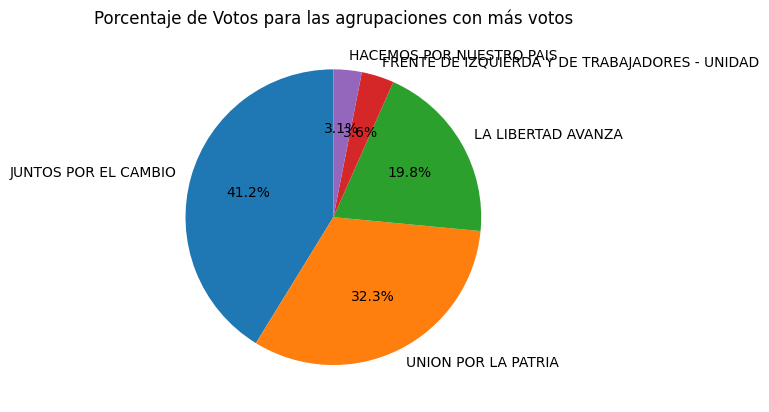

In [11]:
#Veamos cuales son las agrupaciones con mas votos en CABA en orden descendente

votos_por_agrupacion = CABA_nac.groupby('agrupacion_nombre')['votos_cantidad'].sum()

top_5_agrupaciones = votos_por_agrupacion.sort_values(ascending=False).head(10)

print(top_5_agrupaciones)

#Veamos sus porcentajes

votos_por_agrupacion = CABA_nac.groupby('agrupacion_nombre')['votos_cantidad'].sum()

porcentaje_votos = (top_5_agrupaciones / top_5_agrupaciones.sum()) * 100

print(porcentaje_votos)

#Hagamos un pie chart
import matplotlib.pyplot as plt

plt.pie(porcentaje_votos, labels=porcentaje_votos.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Votos para las agrupaciones con más votos')
plt.show()



    circuito_id  votos_cantidad  \
0         00001            7035   
1         00002            6480   
2         00003            2059   
3         00004            1771   
4         00005            6635   
..          ...             ...   
162       00163            9271   
163       00164            8844   
164       00165           14848   
165       00166           12460   
166       00167           10140   

     FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  HACEMOS POR NUESTRO PAIS  \
0                                               342                       188   
1                                               344                       164   
2                                                21                        46   
3                                                15                        28   
4                                               215                       139   
..                                              ...                       ...   
162         

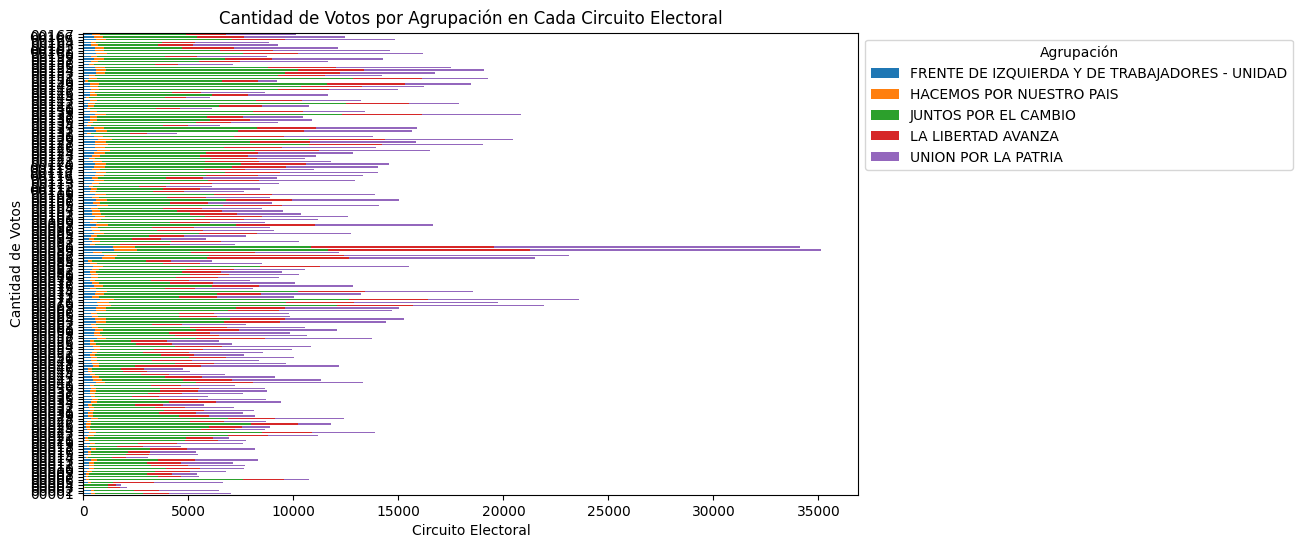

In [16]:
#Ahora queremos ver cuantos votos corresponden a cada agrupacion por circuito electoral

#Hicimos un nuevo data frame sin nan porque cuando lo haciamos con CABA_nac nos tiraba todos los valores duplicados del circuito_id

import matplotlib.pyplot as plt


CABA_nac_sin_nan = CABA_nac.dropna(subset=["agrupacion_nombre"]).copy()

votos_por_agrupacion_circuito = CABA_nac_sin_nan.groupby(['circuito_id', 'agrupacion_nombre'])['votos_cantidad'].sum().reset_index()

votos_por_agrupacion_circuito_pivot = votos_por_agrupacion_circuito.pivot(index='circuito_id', columns='agrupacion_nombre', values='votos_cantidad')

votos_por_circuito = votos_por_agrupacion_circuito.groupby('circuito_id')['votos_cantidad'].sum().reset_index()

resultado_final = pd.merge(votos_por_circuito, votos_por_agrupacion_circuito_pivot, on='circuito_id')

print(resultado_final)


datos_grafico = resultado_final.set_index('circuito_id').iloc[:, 1:]

ax = datos_grafico.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.xlabel('Circuito Electoral')
plt.ylabel('Cantidad de Votos')
plt.title('Cantidad de Votos por Agrupación en Cada Circuito Electoral')
plt.legend(title='Agrupación', bbox_to_anchor=(1, 1))
plt.show()

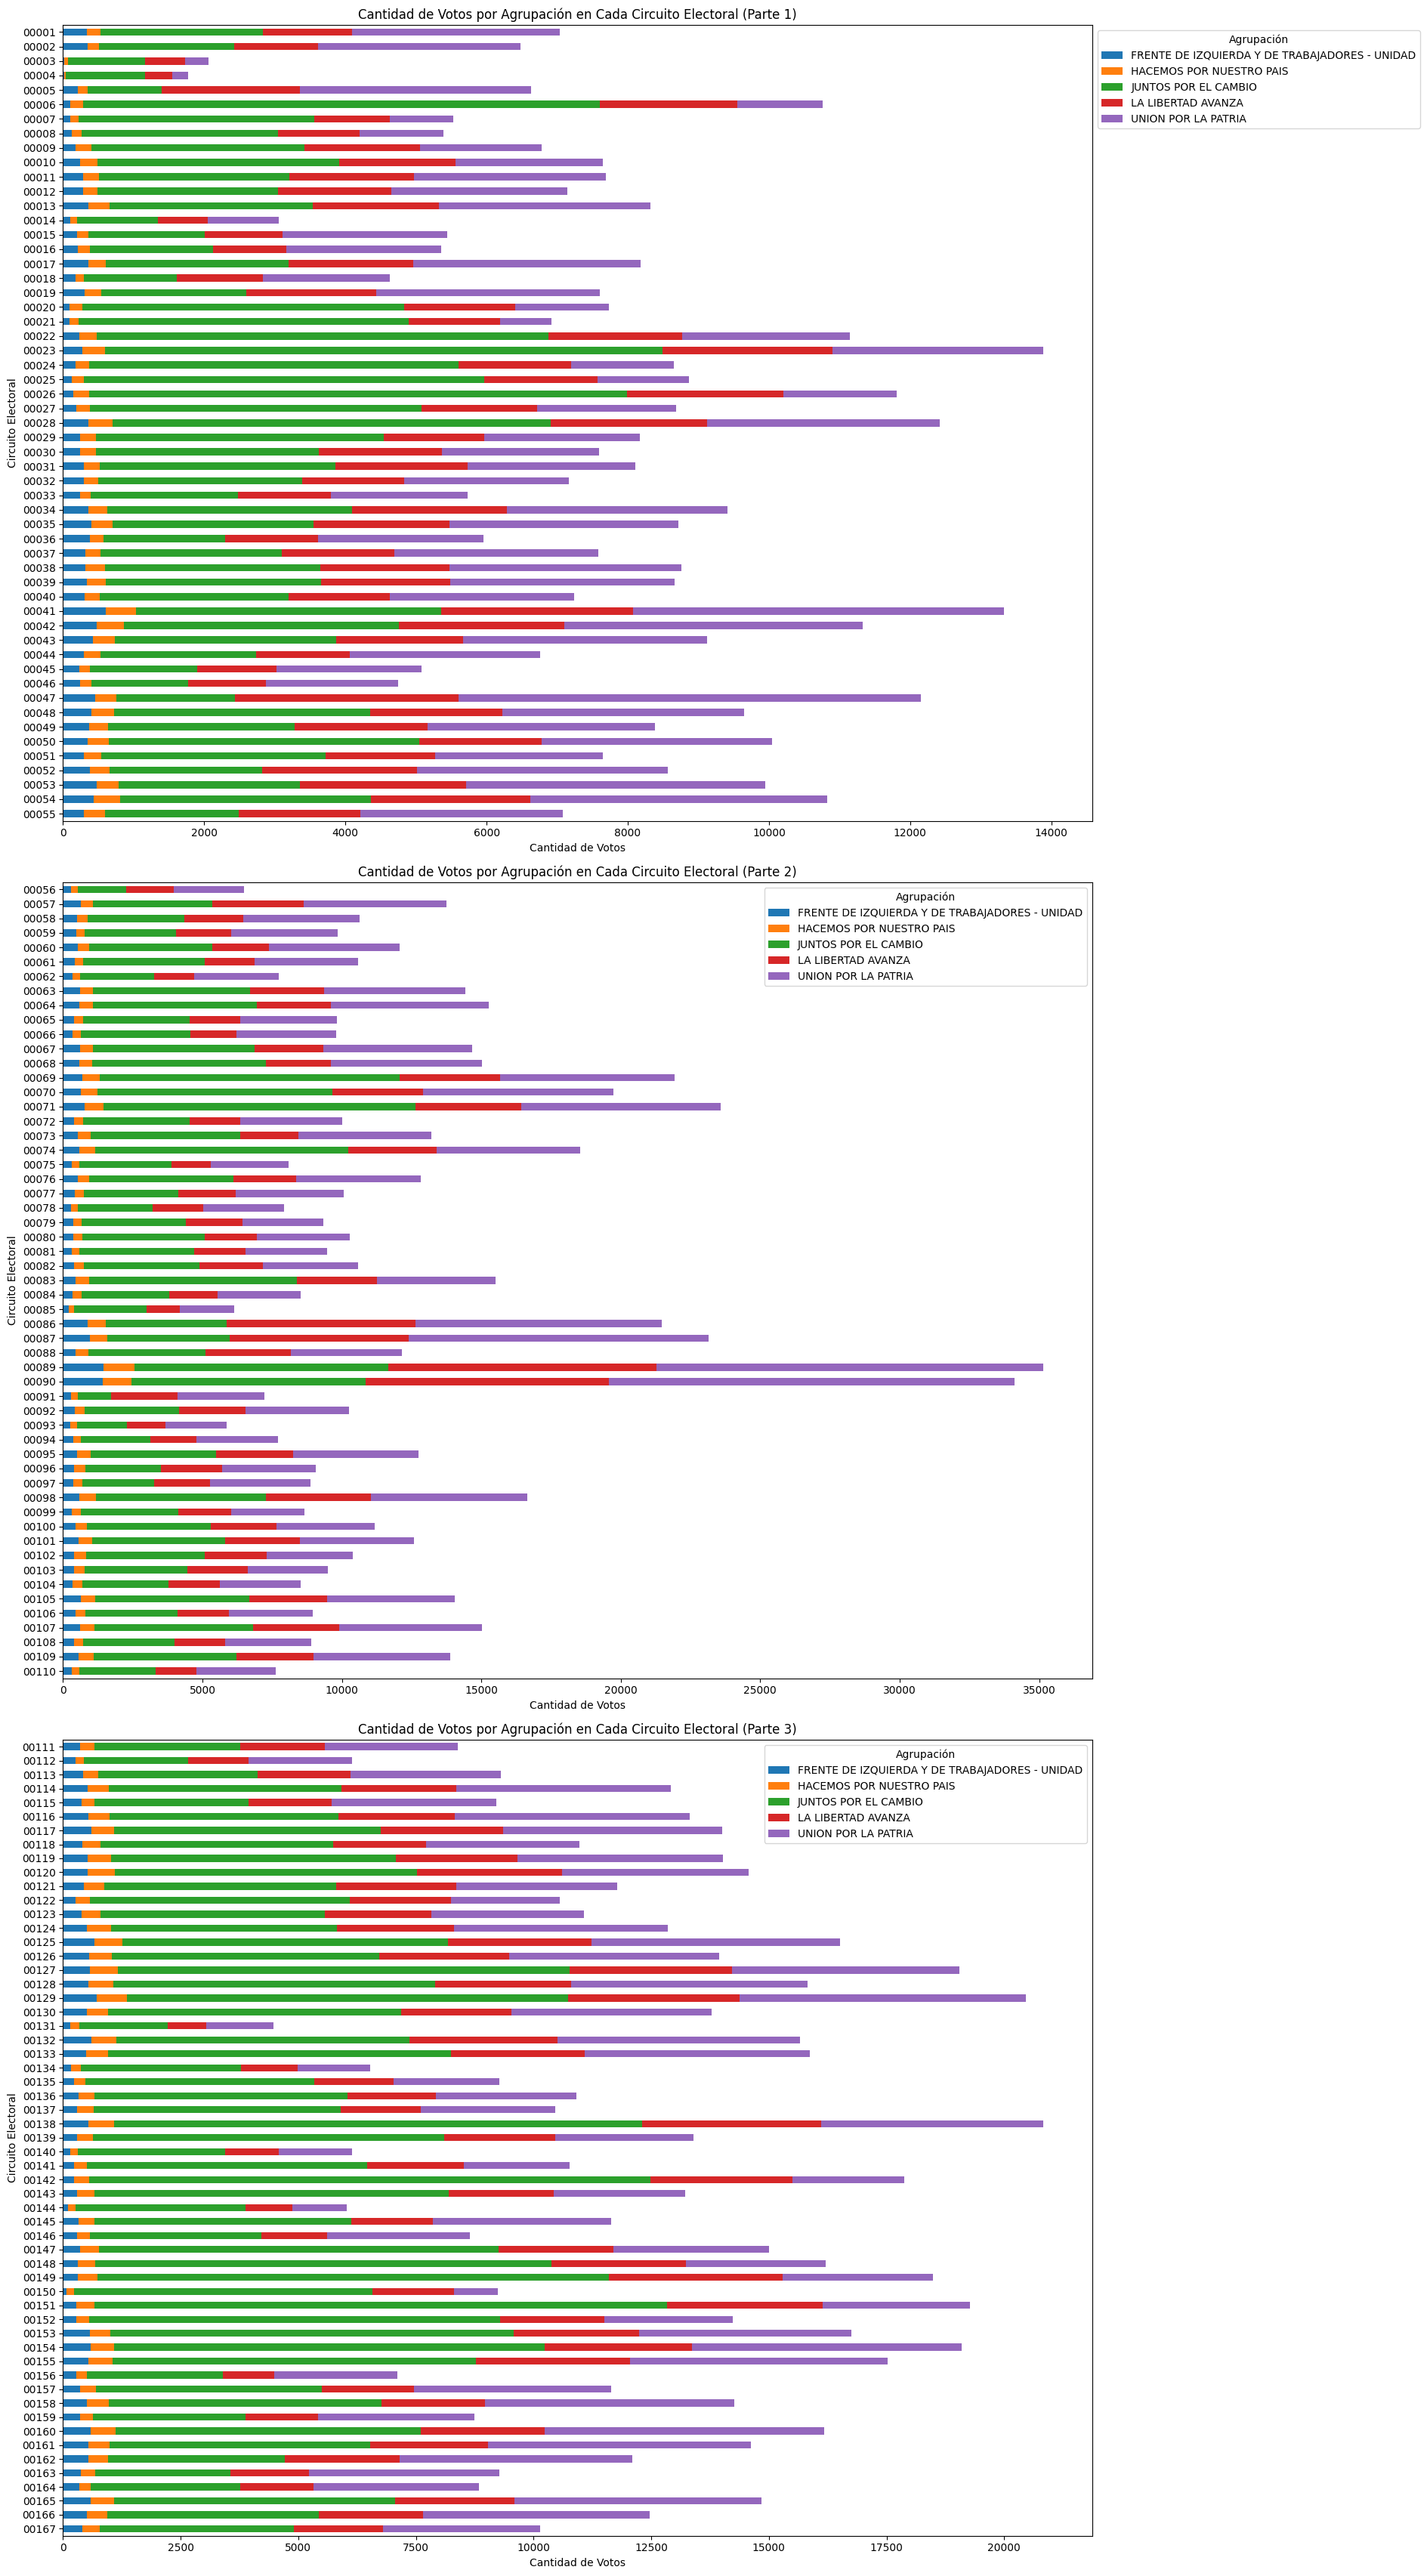

In [17]:
# Dividmos el grafico en tres para que se pueda leer mejor los circuitos electorales
tercio = len(datos_grafico) // 3
datos_grafico_parte1 = datos_grafico.iloc[:tercio, :]
datos_grafico_parte2 = datos_grafico.iloc[tercio:2*tercio, :]
datos_grafico_parte3 = datos_grafico.iloc[2*tercio:, :]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

datos_grafico_parte1.plot(kind='barh', stacked=True, ax=axes[0])
axes[0].set_xlabel('Cantidad de Votos')
axes[0].set_ylabel('Circuito Electoral')
axes[0].set_title('Cantidad de Votos por Agrupación en Cada Circuito Electoral (Parte 1)')
axes[0].legend(title='Agrupación', bbox_to_anchor=(1, 1))
axes[0].invert_yaxis()  # Invertir el eje y para que los circuitos aparezcan en orden descendente

datos_grafico_parte2.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_xlabel('Cantidad de Votos')
axes[1].set_ylabel('Circuito Electoral')
axes[1].set_title('Cantidad de Votos por Agrupación en Cada Circuito Electoral (Parte 2)')
axes[1].legend(title='Agrupación', bbox_to_anchor=(1, 1))
axes[1].invert_yaxis()

datos_grafico_parte3.plot(kind='barh', stacked=True, ax=axes[2])
axes[2].set_xlabel('Cantidad de Votos')
axes[2].set_ylabel('Circuito Electoral')
axes[2].set_title('Cantidad de Votos por Agrupación en Cada Circuito Electoral (Parte 3)')
axes[2].legend(title='Agrupación', bbox_to_anchor=(1, 1))
axes[2].invert_yaxis()

plt.tight_layout(rect=(-1, -1, 0.9, 0.9))

plt.show()

In [ ]:
#Para empezar a hacer el mapa de los circuitos hay que ver que estructura tiene nuestro archivo

import geopandas as gpd

circuitos_geo = gpd.read_file("../utilscircuitos-electorales.shp")

print(circuitos_geo.columns)

circuitos_geo



Index(['ID', 'CIRCUITO_N', 'COMUNA', 'BARRIO', 'TOTAL', 'MASCULINO',
       'FEMENINO', 'PERIMETRO', 'AREA', 'geometry'],
      dtype='object')


,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
0,001,1,1,SAN TELMO,11377.0,5695.0,5682.0,4157.175563,7.097216e+05,"POLYGON ((108905.977 100976.279, 108917.164 10..."
1,002,2,1,SAN TELMO,11365.0,5870.0,5495.0,3045.858735,5.234309e+05,"POLYGON ((107881.924 101308.224, 107875.662 10..."
2,003,3,1,PUERTO MADERO,702.0,416.0,286.0,14439.585623,4.248033e+06,"POLYGON ((109724.494 103784.925, 109730.549 10..."
3,004,4,1,PUERTO MADERO,489.0,307.0,182.0,8028.115470,7.773725e+05,"POLYGON ((108821.032 101896.507, 108775.561 10..."
4,005,5,1,RETIRO,5275.0,3131.0,2144.0,16401.981477,3.262096e+06,"POLYGON ((107316.081 105658.630, 107342.216 10..."
...,...,...,...,...,...,...,...,...,...,...
162,057,57,4,NUEVA POMPEYA,18768.0,9532.0,9236.0,6341.986116,1.681075e+06,"POLYGON ((104581.458 98421.409, 104653.765 980..."
163,089,89,8,VILLA LUGANO,46140.0,23699.0,22441.0,10058.062239,4.524566e+06,"POLYGON ((98904.555 95596.709, 98981.779 95673..."
164,090,90,8,VILLA LUGANO,42538.0,21474.0,21064.0,10870.018985,4.771794e+06,"POLYGON ((99897.211 96584.659, 99892.154 96579..."
165,112,112,10,FLORESTA,8290.0,3945.0,4345.0,3067.804478,5.421711e+05,"POLYGON ((99265.125 99181.872, 99265.240 99181..."


C:\Users\ccbd1\AppData\Local\Temp\ipykernel_22236\27069485.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


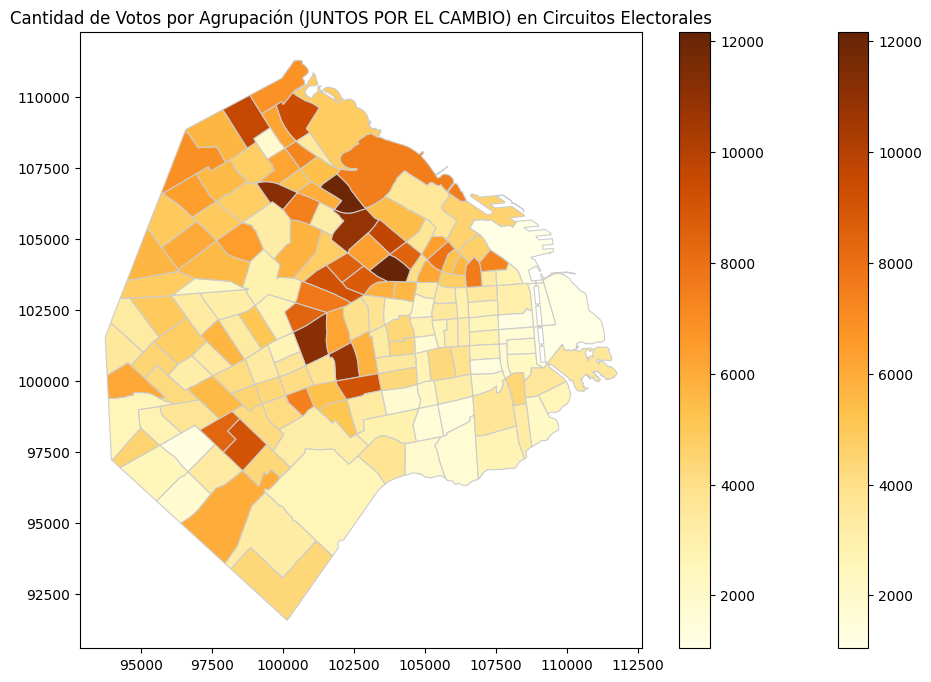

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Definimos colores por cada uno de los partidos, construimos las graficas para cada uno por distritos

circuitos_geo = gpd.read_file("../utils/circuitos-electorales.shp")

df_concatenado = pd.concat([circuitos_geo[['CIRCUITO_N']], resultado_final], axis=1)

circuitos_geo = circuitos_geo.merge(df_concatenado, left_on='CIRCUITO_N', right_on='CIRCUITO_N')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo.plot(column='JUNTOS POR EL CAMBIO', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo['JUNTOS POR EL CAMBIO'].min(), circuitos_geo['JUNTOS POR EL CAMBIO'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos por Agrupación (JUNTOS POR EL CAMBIO) en Circuitos Electorales')

plt.show()

C:\Users\ccbd1\AppData\Local\Temp\ipykernel_11816\1964431088.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


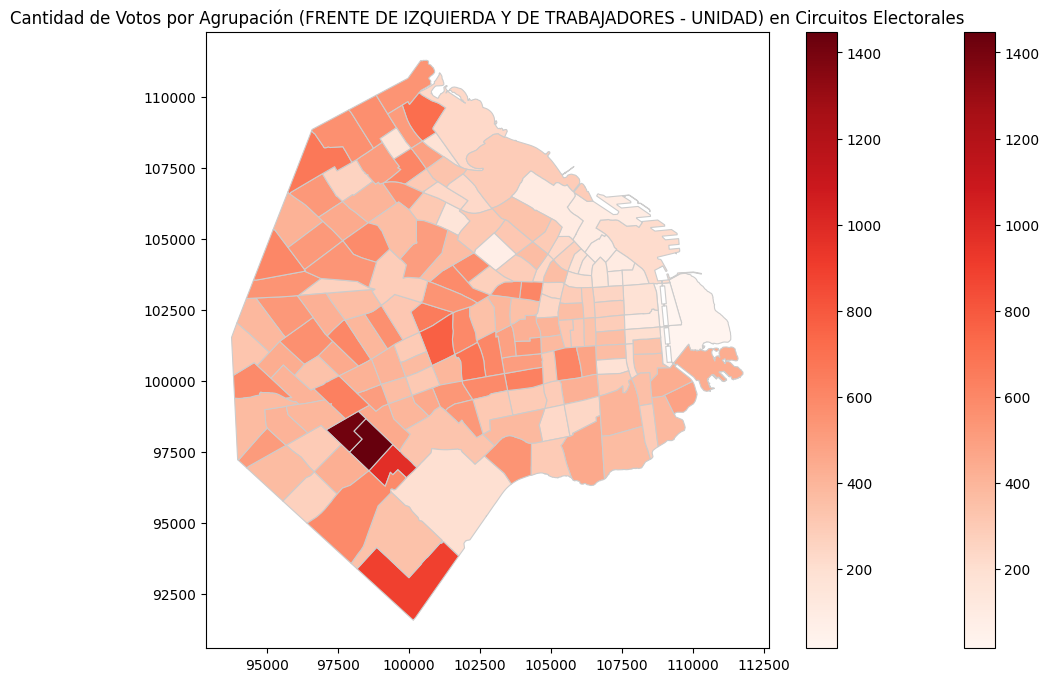

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Definimos colores por cada uno de los partidos, construimos las graficas para cada uno por distritos

circuitos_geo = gpd.read_file("../utils/circuitos-electorales.shp")

df_concatenado = pd.concat([circuitos_geo[['CIRCUITO_N']], resultado_final], axis=1)

circuitos_geo = circuitos_geo.merge(df_concatenado, left_on='CIRCUITO_N', right_on='CIRCUITO_N')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo.plot(column='FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'].min(), circuitos_geo['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'].max()
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos por Agrupación (FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD) en Circuitos Electorales')

plt.show()

C:\Users\ccbd1\AppData\Local\Temp\ipykernel_32424\3360332447.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


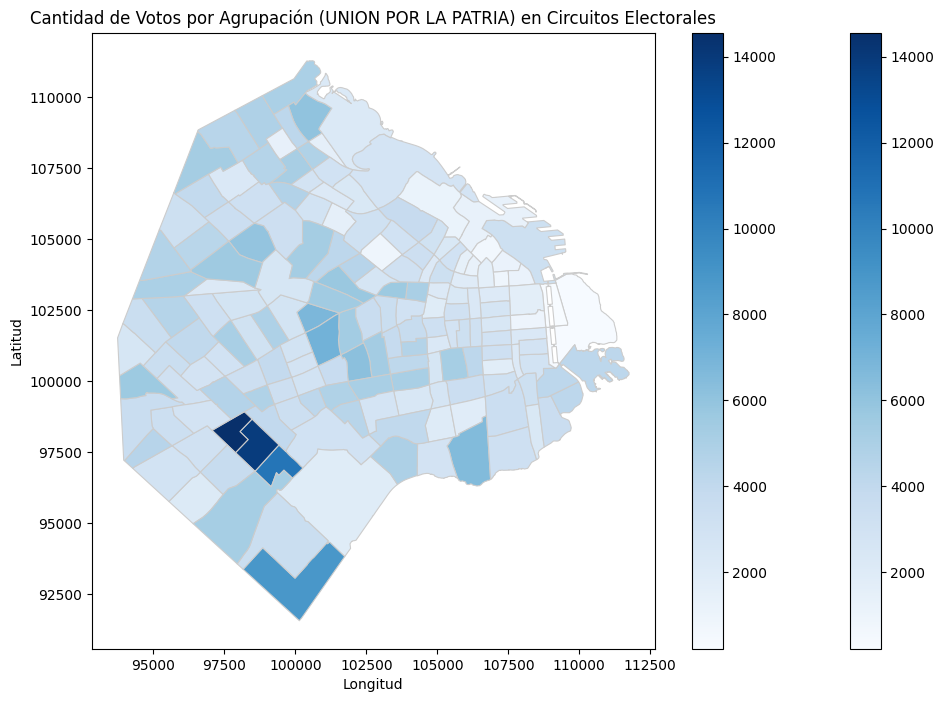

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Definimos colores por cada uno de los partidos, construimos las graficas para cada uno por distritos

circuitos_geo = gpd.read_file("../utils/circuitos-electorales.shp")

df_concatenado = pd.concat([circuitos_geo[['CIRCUITO_N']], resultado_final], axis=1)

circuitos_geo = circuitos_geo.merge(df_concatenado, left_on='CIRCUITO_N', right_on='CIRCUITO_N')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo.plot(column='UNION POR LA PATRIA', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo['UNION POR LA PATRIA'].min(), circuitos_geo['UNION POR LA PATRIA'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos por Agrupación (UNION POR LA PATRIA) en Circuitos Electorales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

C:\Users\ccbd1\AppData\Local\Temp\ipykernel_32424\4212450909.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


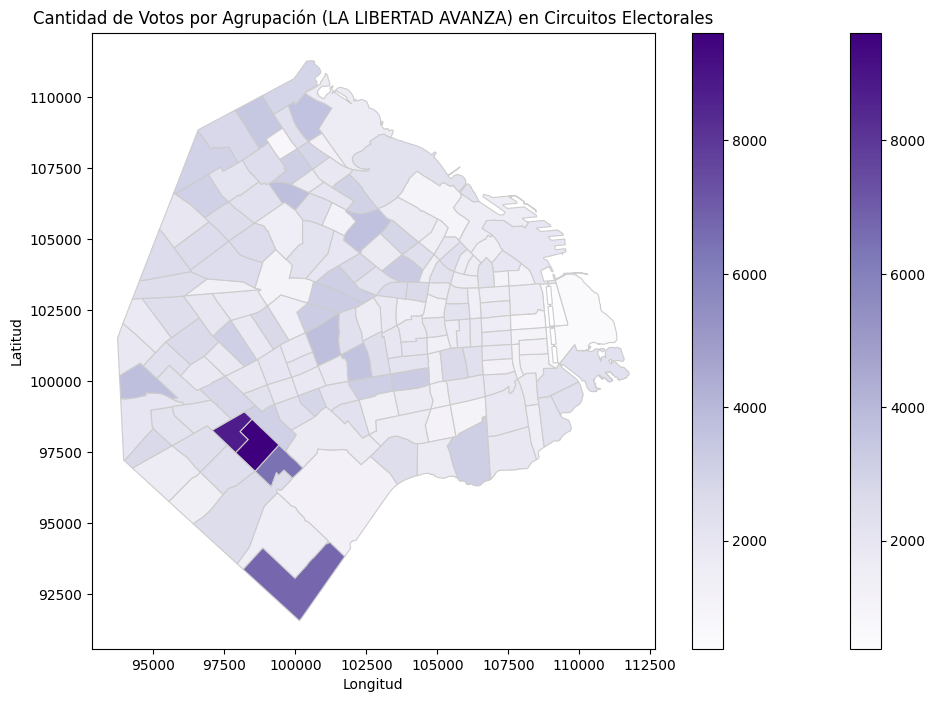

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Definimos colores por cada uno de los partidos, construimos las graficas para cada uno por distritos

circuitos_geo = gpd.read_file("../utils/circuitos-electorales.shp")

df_concatenado = pd.concat([circuitos_geo[['CIRCUITO_N']], resultado_final], axis=1)

circuitos_geo = circuitos_geo.merge(df_concatenado, left_on='CIRCUITO_N', right_on='CIRCUITO_N')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo.plot(column='LA LIBERTAD AVANZA', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo['LA LIBERTAD AVANZA'].min(), circuitos_geo['LA LIBERTAD AVANZA'].max()
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos por Agrupación (LA LIBERTAD AVANZA) en Circuitos Electorales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

C:\Users\ccbd1\AppData\Local\Temp\ipykernel_32424\1477078968.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


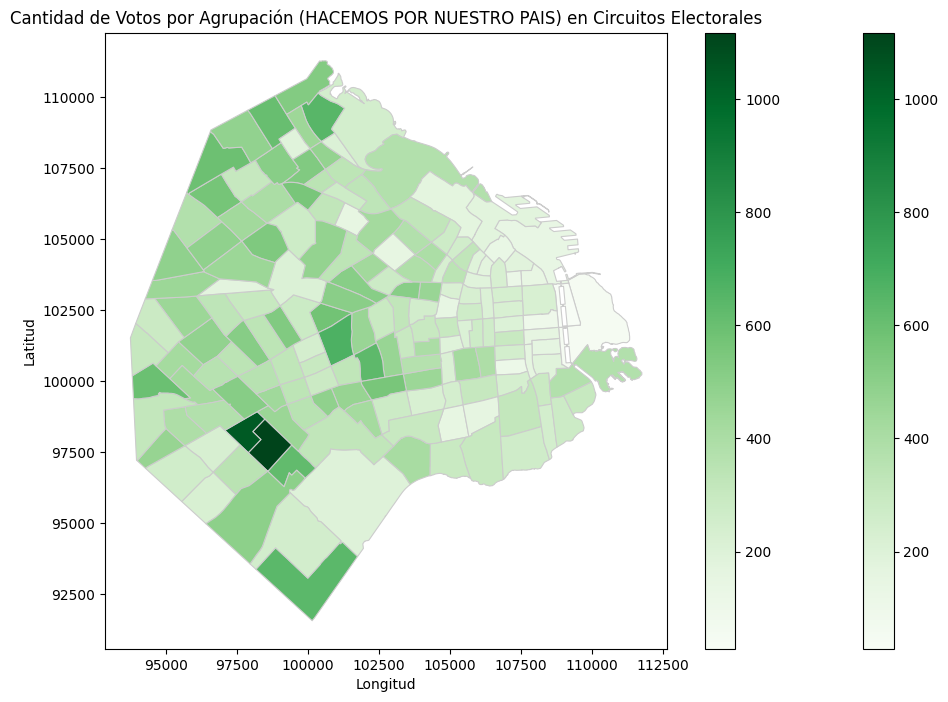

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

#Definimos colores por cada uno de los partidos, construimos las graficas para cada uno por distritos

circuitos_geo = gpd.read_file("../utils/circuitos-electorales.shp")

df_concatenado = pd.concat([circuitos_geo[['CIRCUITO_N']], resultado_final], axis=1)

circuitos_geo = circuitos_geo.merge(df_concatenado, left_on='CIRCUITO_N', right_on='CIRCUITO_N')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo.plot(column='HACEMOS POR NUESTRO PAIS', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo['HACEMOS POR NUESTRO PAIS'].min(), circuitos_geo['HACEMOS POR NUESTRO PAIS'].max()
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos por Agrupación (HACEMOS POR NUESTRO PAIS) en Circuitos Electorales')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.show()

In [21]:
#Queremos saber la concurrencia electoral, tenemos el archivo con el total por circuito electoral y la cantidad de votos emitidos

df_concatenado2 = pd.concat([circuitos_geo[['BARRIO','COMUNA','TOTAL']], resultado_final], axis=1)

df_concatenado2['porcentaje_votantes'] = (df_concatenado2['votos_cantidad'] / df_concatenado2['TOTAL']) * 100

df_concatenado2


,BARRIO,COMUNA,TOTAL,circuito_id,votos_cantidad,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA,porcentaje_votantes
0,SAN TELMO,1,11377.0,00001,7035,342,188,2305,1262,2938,61.835282
1,SAN TELMO,1,11365.0,00002,6480,344,164,1918,1187,2867,57.017158
2,PUERTO MADERO,1,702.0,00003,2059,21,46,1090,571,331,293.304843
3,PUERTO MADERO,1,489.0,00004,1771,15,28,1123,384,221,362.167689
4,RETIRO,1,5275.0,00005,6635,215,139,1045,1960,3276,125.781991
...,...,...,...,...,...,...,...,...,...,...,...
162,NUEVA POMPEYA,4,18768.0,00163,9271,379,298,2876,1677,4041,49.397911
163,VILLA LUGANO,8,46140.0,00164,8844,341,252,3173,1564,3514,19.167750
164,VILLA LUGANO,8,42538.0,00165,14848,588,499,5976,2528,5257,34.905261
165,FLORESTA,10,8290.0,00166,12460,506,437,4487,2223,4807,150.301568


In [22]:
#Como sale truncado imprimiremos con iloc de 50 en 50
print(df_concatenado2.iloc[0:50])

              BARRIO  COMUNA    TOTAL circuito_id  votos_cantidad  \
0          SAN TELMO       1  11377.0       00001            7035   
1          SAN TELMO       1  11365.0       00002            6480   
2      PUERTO MADERO       1    702.0       00003            2059   
3      PUERTO MADERO       1    489.0       00004            1771   
4             RETIRO       1   5275.0       00005            6635   
5             RETIRO       1  17159.0       00006           10764   
6             RETIRO       1   9011.0       00007            5525   
7             RETIRO       1   9483.0       00008            5393   
8        SAN NICOLAS       1  12534.0       00009            6782   
9        SAN NICOLAS       1  14356.0       00010            7643   
10       SAN NICOLAS       1  15584.0       00011            7687   
11        MONTSERRAT       1  14284.0       00012            7139   
12        MONTSERRAT       1  13733.0       00013            8322   
13        MONTSERRAT       1   598

In [23]:
print(df_concatenado2.iloc[50:100])

               BARRIO  COMUNA    TOTAL circuito_id  votos_cantidad  \
50           BARRACAS       4  10026.0       00051            7649   
51               BOCA       4  12484.0       00052            8567   
52               BOCA       4  14884.0       00053            9952   
53               BOCA       4  13241.0       00054           10824   
54      NUEVA POMPEYA       4   9973.0       00055            7083   
55              BOEDO       5  13294.0       00056            6477   
56              BOEDO       5  12152.0       00057           13747   
57              BOEDO       5  14712.0       00058           10637   
58            ALMAGRO       5  14863.0       00059            9843   
59            ALMAGRO       5   9659.0       00060           12077   
60            ALMAGRO       5  19705.0       00061           10568   
61            ALMAGRO       5  21668.0       00062            7725   
62            ALMAGRO       5  13353.0       00063           14422   
63            ALMAGR

In [24]:
print(df_concatenado2.iloc[100:150])

                BARRIO  COMUNA    TOTAL circuito_id  votos_cantidad  \
100       MONTE CASTRO      10  17697.0       00101           12590   
101         VILLA LURO      10  10709.0       00102           10384   
102         VILLA LURO      10  17390.0       00103            9508   
103    VELEZ SARSFIELD      10  11216.0       00104            8519   
104    VELEZ SARSFIELD      10  18865.0       00105           14060   
105           FLORESTA      10   9846.0       00106            8965   
106   VILLA SANTA RITA      11  12152.0       00107           15024   
107   VILLA SANTA RITA      11  14866.0       00108            8896   
108  VILLA GRAL. MITRE      11  12357.0       00109           13872   
109  VILLA GRAL. MITRE      11  17082.0       00110            7626   
110   VILLA DEL PARQUE      11  17647.0       00111            8394   
111   VILLA DEL PARQUE      11  13207.0       00112            6140   
112   VILLA DEL PARQUE      11  17728.0       00113            9302   
113   

In [25]:
print(df_concatenado2.iloc[150:])

            BARRIO  COMUNA    TOTAL circuito_id  votos_cantidad  \
150        PALERMO      14  15921.0       00151           19269   
151   VILLA CRESPO      15  19488.0       00152           14231   
152   VILLA CRESPO      15  12238.0       00153           16757   
153   VILLA CRESPO      15  23031.0       00154           19097   
154   VILLA CRESPO      15  20173.0       00155           17516   
155       PATERNAL      15  17116.0       00156            7100   
156      CHACARITA      15  12324.0       00157           11653   
157      CHACARITA      15  10840.0       00158           14271   
158  VILLA ORTUZAR      15  18875.0       00159            8745   
159    PARQUE CHAS      15  15685.0       00160           16182   
160      AGRONOMIA      15  12095.0       00161           14615   
161  NUEVA POMPEYA       4   9544.0       00162           12105   
162  NUEVA POMPEYA       4  18768.0       00163            9271   
163   VILLA LUGANO       8  46140.0       00164            884

In [ ]:
# Obtener las 10 filas con los mayores valores en la columna 'votos_cantidad'
filas_votos_10 = df_concatenado2.nlargest(10, 'votos_cantidad')

# Imprimir las filas obtenidas
print(filas_votos_10)

                BARRIO  COMUNA    TOTAL  circuito_id  votos_cantidad  \
88   PARQUE AVELLANEDA       9   8100.0           89           35147   
89   PARQUE AVELLANEDA       9  10740.0           90           34127   
70           CABALLITO       6  16146.0           71           23578   
86   PARQUE AVELLANEDA       9   7415.0           87           23139   
68           CABALLITO       6  29245.0           69           21943   
85     VILLA RIACHUELO       8  15703.0           86           21482   
137           BELGRANO      13   8353.0          138           20829   
128              NUÑEZ      13   9792.0          129           20455   
69           CABALLITO       6  12639.0           70           19726   
150            PALERMO      14  15921.0          151           19269   

     FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  HACEMOS POR NUESTRO PAIS  \
88                                             1447                      1118   
89                                           

In [ ]:
#Queremos agrupar los votos por comunas
#Hacemos una copia de nuestro dataframe
df_concatenado3 = df_concatenado2.copy()

#Eliminamos las columnas que no nos interesan
columnas_a_eliminar = ['BARRIO', 'circuito_id', 'TOTAL', 'porcentaje_votantes']
df_concatenado3.drop(columnas_a_eliminar, axis=1, inplace=True)

#Ahora agrupamos las columnas
columnas_de_votos = ['votos_cantidad', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'HACEMOS POR NUESTRO PAIS', 'JUNTOS POR EL CAMBIO','LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']
df_comunas = df_concatenado3.groupby('COMUNA')[columnas_de_votos].sum().reset_index()
df_comunas


,COMUNA,votos_cantidad,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,HACEMOS POR NUESTRO PAIS,JUNTOS POR EL CAMBIO,LA LIBERTAD AVANZA,UNION POR LA PATRIA
0,1,117488,3981,3230,45975,25657,38645
1,2,98284,1912,2250,57022,17875,19225
2,3,109563,4571,3362,39075,23562,38993
3,4,131390,5582,4242,40577,28199,52790
4,5,110588,4791,3593,39552,21489,41163
5,6,114777,4038,3434,50165,18887,38253
6,7,134382,4900,4385,55900,25445,43752
7,8,51303,2014,1584,16104,12042,19559
8,9,166314,6948,5477,44702,42645,66542
9,10,123109,5058,4622,47246,25728,40455


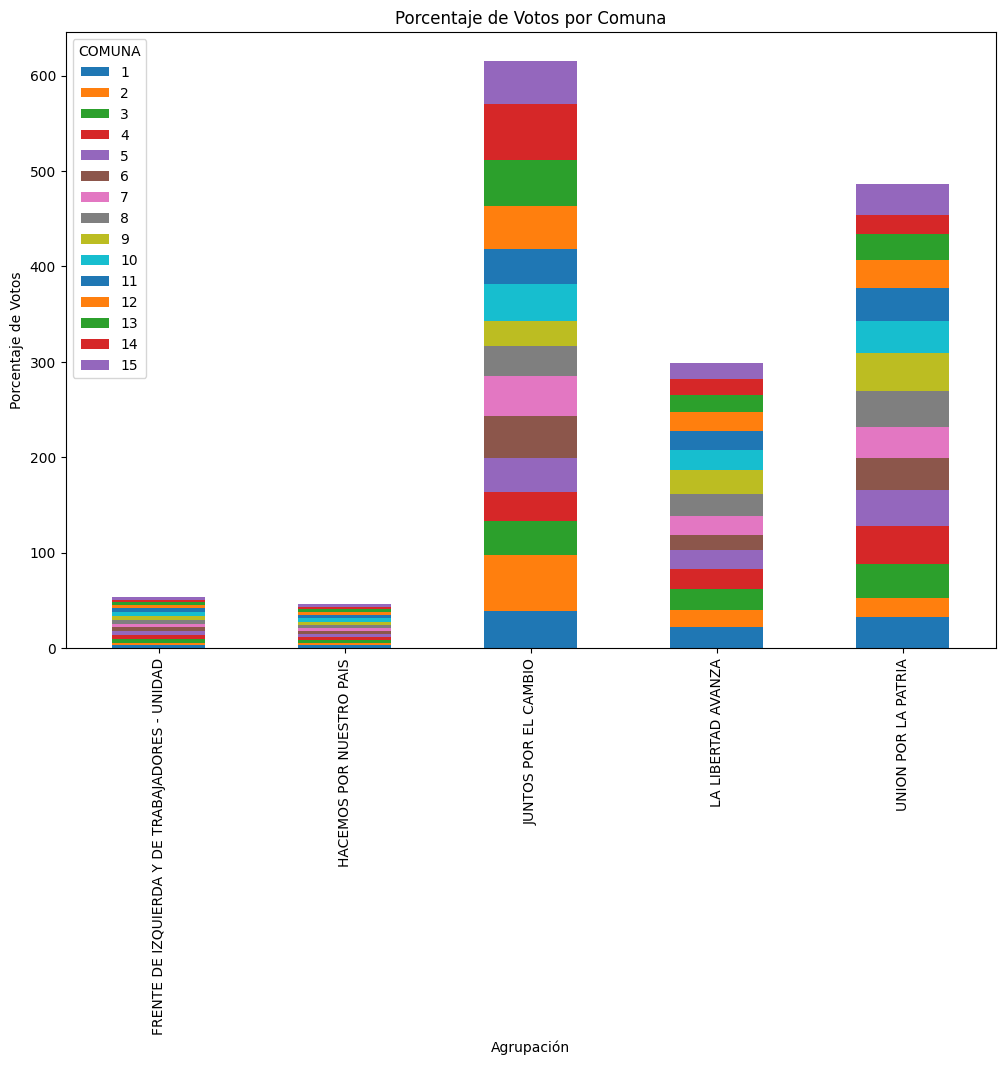

In [ ]:
#Haremos una copia del df de arriba y lo transformaremos en los porcentajes de los votos en cada comuna
df_comunas_porcentaje = df_comunas.copy()

# Calcular el porcentaje para cada columna de votos
columnas_de_votos = ['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'HACEMOS POR NUESTRO PAIS', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']

# Calcular el porcentaje dividiendo cada valor por el total en 'votos_cantidad'
df_comunas_porcentaje[columnas_de_votos] = df_comunas_porcentaje[columnas_de_votos].div(df_comunas_porcentaje['votos_cantidad'], axis=0) * 100

df_comunas_porcentaje

#Queremos verlo en gráfico
# Seleccionar las columnas de votos en porcentaje
columnas_de_votos_porcentaje = ['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD',
                                'HACEMOS POR NUESTRO PAIS', 'JUNTOS POR EL CAMBIO',
                                'LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']

# Filtrar el DataFrame para las columnas deseadas
df_plot = df_comunas_porcentaje[['COMUNA'] + columnas_de_votos_porcentaje]

# Establecer 'COMUNA' como índice para usarlo en el gráfico
df_plot.set_index('COMUNA', inplace=True)

# Transponer el DataFrame para tener agrupaciones como columnas
df_plot_transpuesto = df_plot.transpose()

# Hacer el gráfico de barras verticales
ax = df_plot_transpuesto.plot(kind='bar', figsize=(12, 8), stacked=True)

# Configurar etiquetas y título
plt.ylabel('Porcentaje de Votos')
plt.xlabel('Agrupación')
plt.title('Porcentaje de Votos por Comuna')

# Mostrar el gráfico
plt.show()


C:\Users\ccbd1\AppData\Local\Temp\ipykernel_22236\952779919.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


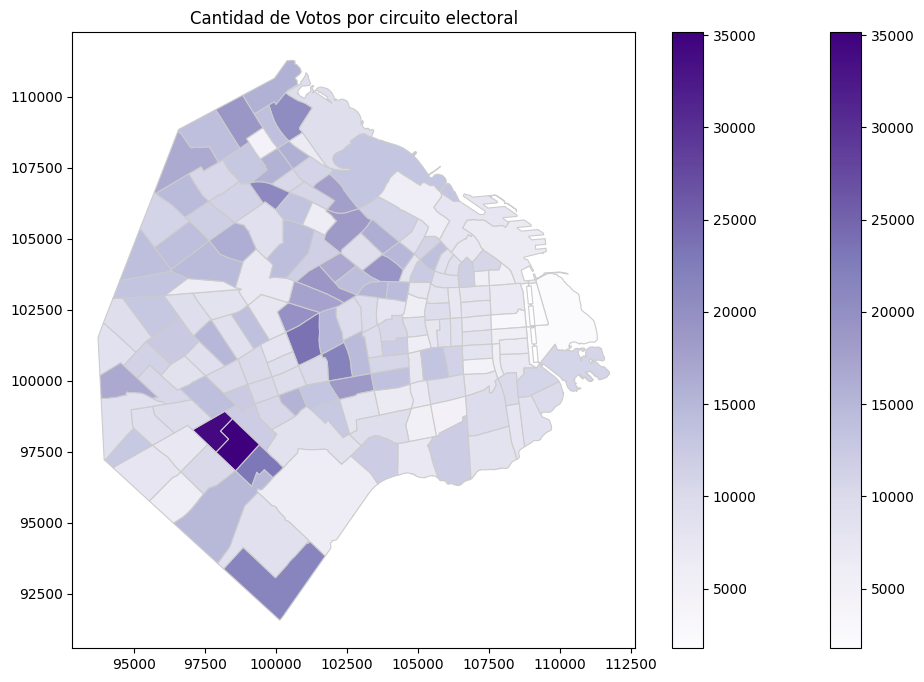

In [ ]:
#Queremos hacer un mapa de la cantidad de votos

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo.plot(column='votos_cantidad', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo['votos_cantidad'].min(), circuitos_geo['votos_cantidad'].max()
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos por circuito electoral')
plt.show()

In [ ]:
#Podriamos analizar los circuitos electorales en base a voto masculino y femenino en base al documento de los circuitos

import geopandas as gpd
import pandas as pd

# Realizamos la combinación basada en el circuito_id
df_combinado = pd.merge(circuitos_geo, resultado_final, left_on='circuito_id', right_on='circuito_id', how='inner')

print(df_combinado.head())

    ID  CIRCUITO_N  COMUNA         BARRIO    TOTAL  MASCULINO  FEMENINO  \
0  001           1       1      SAN TELMO  11377.0     5695.0    5682.0   
1  002           2       1      SAN TELMO  11365.0     5870.0    5495.0   
2  003           3       1  PUERTO MADERO    702.0      416.0     286.0   
3  004           4       1  PUERTO MADERO    489.0      307.0     182.0   
4  005           5       1         RETIRO   5275.0     3131.0    2144.0   

      PERIMETRO          AREA  \
0   4157.175563  7.097216e+05   
1   3045.858735  5.234309e+05   
2  14439.585623  4.248033e+06   
3   8028.115470  7.773725e+05   
4  16401.981477  3.262096e+06   

                                            geometry  ...  \
0  POLYGON ((108905.977 100976.279, 108917.164 10...  ...   
1  POLYGON ((107881.924 101308.224, 107875.662 10...  ...   
2  POLYGON ((109724.494 103784.925, 109730.549 10...  ...   
3  POLYGON ((108821.032 101896.507, 108775.561 10...  ...   
4  POLYGON ((107316.081 105658.630, 107342.21

In [ ]:
#Queremos solo ciertos datos en este dataframe, queremos sacar perimetro, area y geometry

columnas_a_eliminar = ['PERIMETRO', 'AREA', 'geometry']

df_combinado = df_combinado.drop(columnas_a_eliminar, axis=1)

print(df_combinado.head())

    ID  CIRCUITO_N  COMUNA         BARRIO    TOTAL  MASCULINO  FEMENINO  \
0  001           1       1      SAN TELMO  11377.0     5695.0    5682.0   
1  002           2       1      SAN TELMO  11365.0     5870.0    5495.0   
2  003           3       1  PUERTO MADERO    702.0      416.0     286.0   
3  004           4       1  PUERTO MADERO    489.0      307.0     182.0   
4  005           5       1         RETIRO   5275.0     3131.0    2144.0   

  circuito_id  votos_cantidad_x  \
0       00001              7035   
1       00002              6480   
2       00003              2059   
3       00004              1771   
4       00005              6635   

   FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD_x  \
0                                               342   
1                                               344   
2                                                21   
3                                                15   
4                                               215   

   HACE

In [ ]:
#Queremos saber en que circuitos hay más mujeres u hombres y ver la relación con los votos de cada partido, por lo que añadiremos una columna

df_combinado['mayor_genero'] = 'Empate'
df_combinado.loc[df_combinado['FEMENINO'] > df_combinado['MASCULINO'], 'mayor_genero'] = 'Femenino'
df_combinado.loc[df_combinado['MASCULINO'] > df_combinado['FEMENINO'], 'mayor_genero'] = 'Masculino'

print(df_combinado.head())

    ID  CIRCUITO_N  COMUNA         BARRIO    TOTAL  MASCULINO  FEMENINO  \
0  001           1       1      SAN TELMO  11377.0     5695.0    5682.0   
1  002           2       1      SAN TELMO  11365.0     5870.0    5495.0   
2  003           3       1  PUERTO MADERO    702.0      416.0     286.0   
3  004           4       1  PUERTO MADERO    489.0      307.0     182.0   
4  005           5       1         RETIRO   5275.0     3131.0    2144.0   

  circuito_id  votos_cantidad_x  \
0       00001              7035   
1       00002              6480   
2       00003              2059   
3       00004              1771   
4       00005              6635   

   FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD_x  ...  \
0                                               342  ...   
1                                               344  ...   
2                                                21  ...   
3                                                15  ...   
4                                     

In [ ]:
#Queremos ver nuestro voto nulo y en blanco, volveremos a utilizar nuestro df CABA_nac

voto_nulo=CABA_nac.loc[CABA_nac["votos_tipo"]=="NULO"]
voto_nulo

total_suma_nulos = voto_nulo['votos_cantidad'].sum()

print(f"La suma total de los votos nulos es: {total_suma_nulos}")

#Queremos saber el total de los positivos

total_suma_votos=CABA_nac['votos_cantidad'].sum()

print(f"La suma total de los votos positivos es: {total_suma_votos}")

La suma total de los votos nulos es: 15367
La suma total de los votos positivos es: 1911431


In [ ]:
voto_blanco=CABA_nac.loc[CABA_nac["votos_tipo"]=="EN BLANCO"]
voto_blanco

total_suma_blanco = voto_blanco['votos_cantidad'].sum()
print(f"La suma total de los votos en blanco es: {total_suma_blanco}")

La suma total de los votos en blanco es: 32311


In [ ]:
#Porcentajes

porcentaje_nulos = (total_suma_nulos / total_suma_votos) * 100

porcentaje_blancos = (total_suma_blanco / total_suma_votos) * 100

print(f"Porcentaje de votos nulos: {porcentaje_nulos:.2f}%")
print(f"Porcentaje de votos en blanco: {porcentaje_blancos:.2f}%")

Porcentaje de votos nulos: 0.80%
Porcentaje de votos en blanco: 1.69%


C:\Users\ccbd1\AppData\Local\Temp\ipykernel_22236\1618552982.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


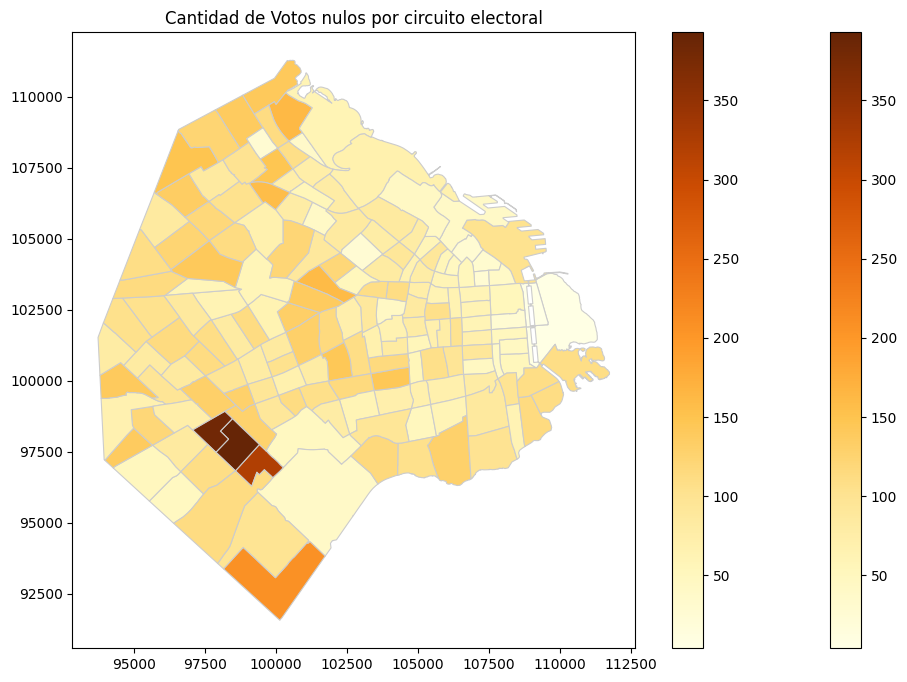

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Queremos ver los votos nulos por circuito
votos_nulos_circuito = voto_nulo.groupby(['circuito_id', 'seccion_nombre'])['votos_cantidad'].sum().reset_index()

votos_nulos_circuito_pivot = votos_nulos_circuito.pivot(index='circuito_id', columns='seccion_nombre', values='votos_cantidad')

votos_nulos_circuito2 = votos_nulos_circuito.groupby('circuito_id')['votos_cantidad'].sum().reset_index()

votos_nulo2 = pd.merge(votos_nulos_circuito2, votos_nulos_circuito_pivot, on='circuito_id')

# Cambia el nombre de la columna para evitar conflictos
votos_nulo2 = votos_nulo2.rename(columns=lambda x: f'{x}_nulo' if x != 'circuito_id' else x)

nulo_concat = pd.concat([circuitos_geo[['CIRCUITO_N']], votos_nulo2], axis=1)

# Utiliza otra variable para no sobrescribir circuitos_geo
circuitos_geo_nulo = circuitos_geo.merge(nulo_concat, left_on='CIRCUITO_N', right_on='CIRCUITO_N', suffixes=('_circuitos_geo', '_nulo_concat'))

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo_nulo.plot(column='votos_cantidad_nulo', cmap='YlOrBr', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo_nulo['votos_cantidad_nulo'].min(), circuitos_geo_nulo['votos_cantidad_nulo'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrBr', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos nulos por circuito electoral')
plt.show()



C:\Users\ccbd1\AppData\Local\Temp\ipykernel_22236\183120088.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


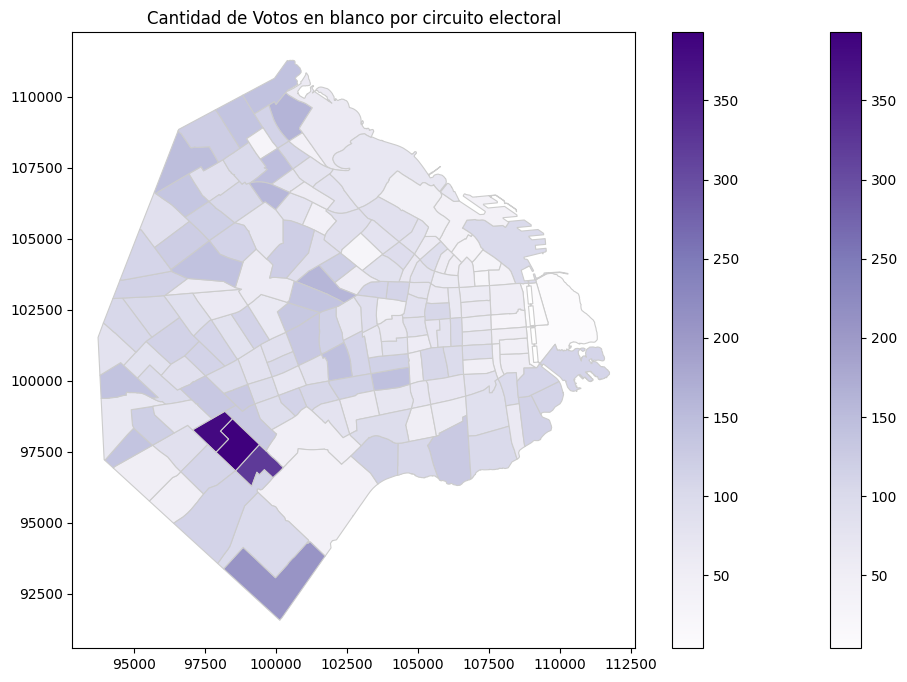

In [ ]:
# Queremos ver los votos en blanco por circuito
votos_blanco_circuito = voto_blanco.groupby(['circuito_id', 'seccion_nombre'])['votos_cantidad'].sum().reset_index()

votos_blanco_circuito_pivot = votos_blanco_circuito.pivot(index='circuito_id', columns='seccion_nombre', values='votos_cantidad')

votos_blanco_circuito2 = votos_blanco_circuito.groupby('circuito_id')['votos_cantidad'].sum().reset_index()

votos_blanco2 = pd.merge(votos_nulos_circuito2, votos_blanco_circuito_pivot, on='circuito_id')

# Cambia el nombre de la columna para evitar conflictos
votos_blanco2 = votos_blanco2.rename(columns=lambda x: f'{x}_nulo' if x != 'circuito_id' else x)

blanco_concat = pd.concat([circuitos_geo[['CIRCUITO_N']], votos_blanco2], axis=1)

# Utiliza otra variable para no sobrescribir circuitos_geo
circuitos_geo_blanco = circuitos_geo.merge(nulo_concat, left_on='CIRCUITO_N', right_on='CIRCUITO_N', suffixes=('_circuitos_geo', '_nulo_concat'))

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
circuitos_geo_blanco.plot(column='votos_cantidad_nulo', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

vmin, vmax = circuitos_geo_blanco['votos_cantidad_nulo'].min(), circuitos_geo_blanco['votos_cantidad_nulo'].max()
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

plt.title('Cantidad de Votos en blanco por circuito electoral')
plt.show()


In [ ]:
#Queremos saber que circuitos electorales tienen los mayores valores tanto para JxC como para LLA

df_ordenado = resultado_final.sort_values(by=['LA LIBERTAD AVANZA', 'JUNTOS POR EL CAMBIO'], ascending=[False, False])

top_10_circuitos = df_ordenado.head(10)

print(f"Los 10 circuitos con más votos para 'LA LIBERTAD AVANZA' y 'JUNTOS POR EL CAMBIO' son:")
print(top_10_circuitos)

Los 10 circuitos con más votos para 'LA LIBERTAD AVANZA' y 'JUNTOS POR EL CAMBIO' son:
    circuito_id  votos_cantidad  \
88        00089           35147   
89        00090           34127   
85        00086           21482   
86        00087           23139   
137       00138           20829   
70        00071           23578   
97        00098           16653   
148       00149           18479   
128       00129           20455   
68        00069           21943   

     FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  HACEMOS POR NUESTRO PAIS  \
88                                             1447                      1118   
89                                             1415                      1044   
85                                              889                       637   
86                                              972                       622   
137                                             536                       557   
70                                       

In [ ]:
descripcion = resultado_final.describe()
print(descripcion)

       votos_cantidad  FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD  \
count      167.000000                                      167.000000   
mean     11145.958084                                      396.077844   
std       4940.758466                                      198.675766   
min       1771.000000                                       15.000000   
25%       7835.000000                                      289.500000   
50%      10039.000000                                      367.000000   
75%      13824.500000                                      510.500000   
max      35147.000000                                     1447.000000   

       HACEMOS POR NUESTRO PAIS  JUNTOS POR EL CAMBIO  LA LIBERTAD AVANZA  \
count                167.000000            167.000000           167.00000   
mean                 344.952096           4595.011976          2212.11976   
std                  157.071421           2386.931589          1138.40524   
min                   28.000000   

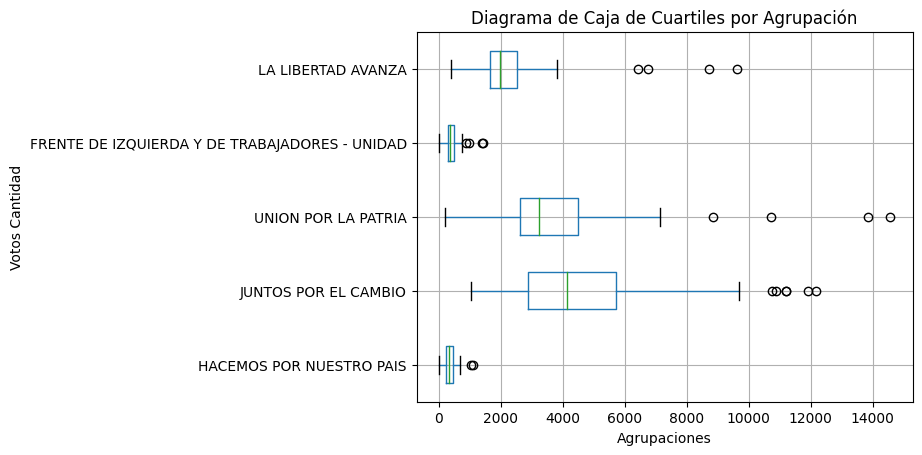

In [ ]:
import matplotlib.pyplot as plt

columnas_interes = ['HACEMOS POR NUESTRO PAIS', 'JUNTOS POR EL CAMBIO', 'UNION POR LA PATRIA', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'LA LIBERTAD AVANZA']

resultado_final[columnas_interes].boxplot(vert=False)

plt.xlabel('Agrupaciones')
plt.ylabel('Votos Cantidad')
plt.title('Diagrama de Caja de Cuartiles por Agrupación')

plt.show()

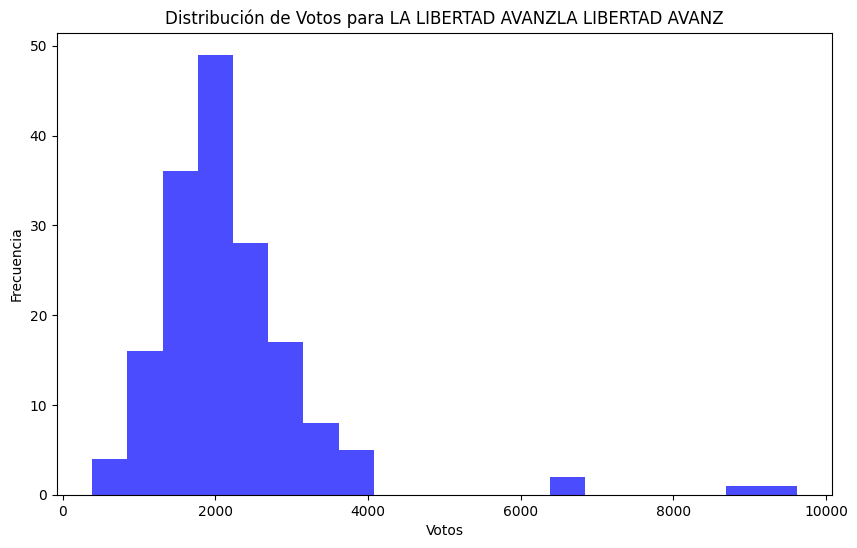

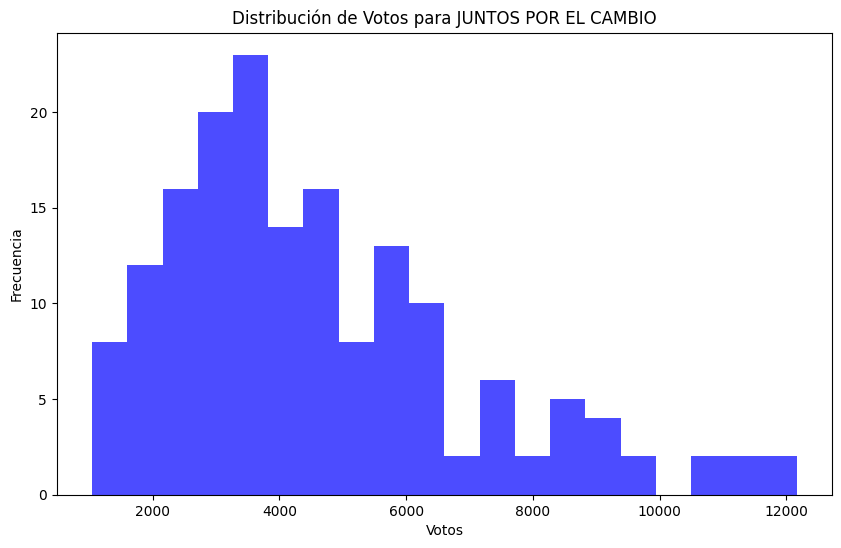

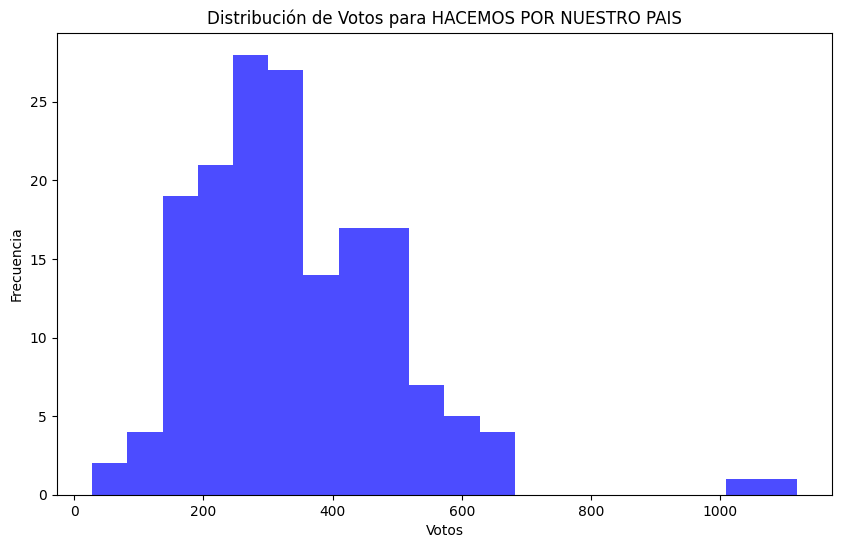

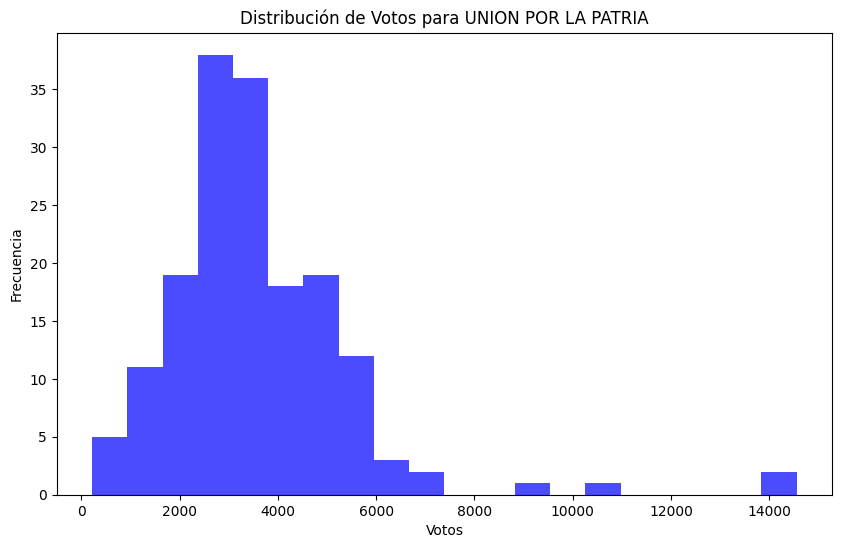

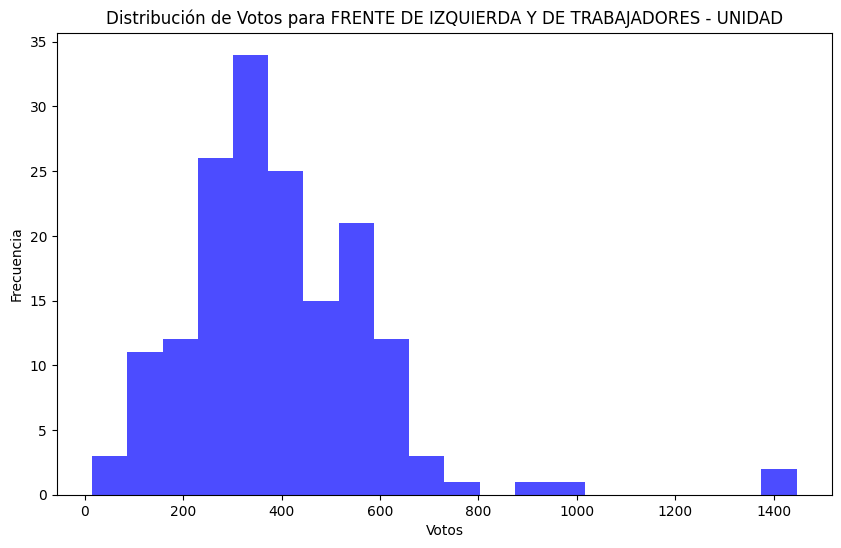

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(resultado_final['LA LIBERTAD AVANZA'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Votos para LA LIBERTAD AVANZLA LIBERTAD AVANZ')
plt.xlabel('Votos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(resultado_final['JUNTOS POR EL CAMBIO'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Votos para JUNTOS POR EL CAMBIO')
plt.xlabel('Votos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(resultado_final['HACEMOS POR NUESTRO PAIS'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Votos para HACEMOS POR NUESTRO PAIS')
plt.xlabel('Votos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(resultado_final['UNION POR LA PATRIA'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Votos para UNION POR LA PATRIA')
plt.xlabel('Votos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(resultado_final['FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Votos para FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD')
plt.xlabel('Votos')
plt.ylabel('Frecuencia')
plt.show()

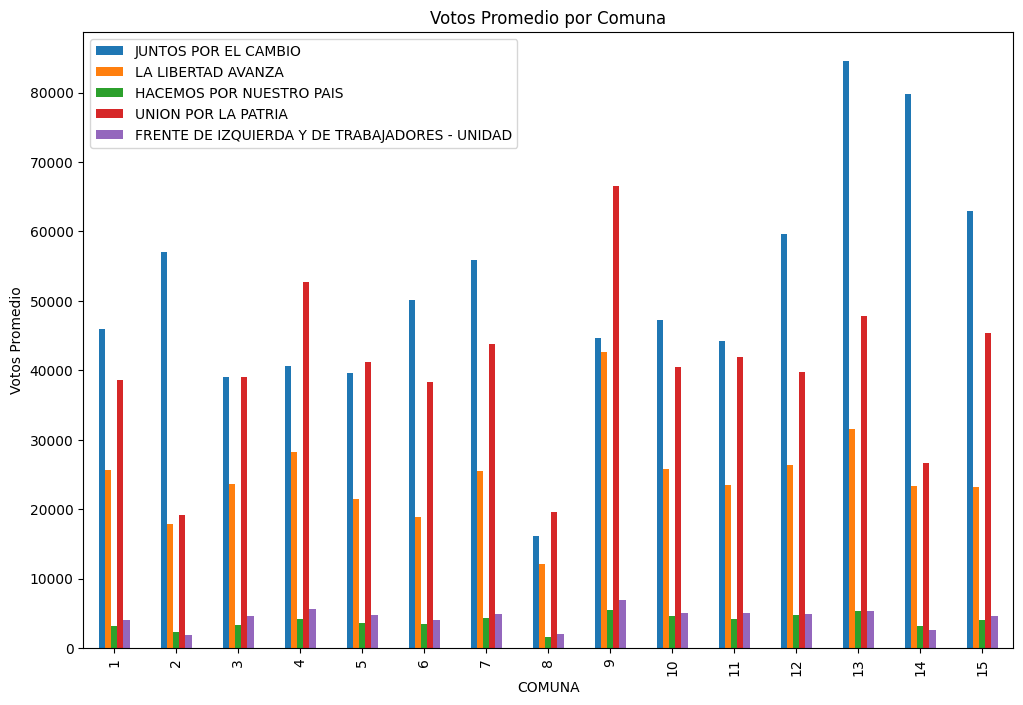

In [ ]:
analisis_comuna = df_comunas.groupby('COMUNA').agg({'JUNTOS POR EL CAMBIO': 'mean', 'LA LIBERTAD AVANZA': 'mean', 'HACEMOS POR NUESTRO PAIS': 'mean', 'UNION POR LA PATRIA': 'mean', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': 'mean'})
analisis_comuna.plot(kind='bar', figsize=(12, 8), title='Votos Promedio por Comuna')
plt.xlabel('COMUNA')
plt.ylabel('Votos Promedio')
plt.show()

C:\Users\ccbd1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


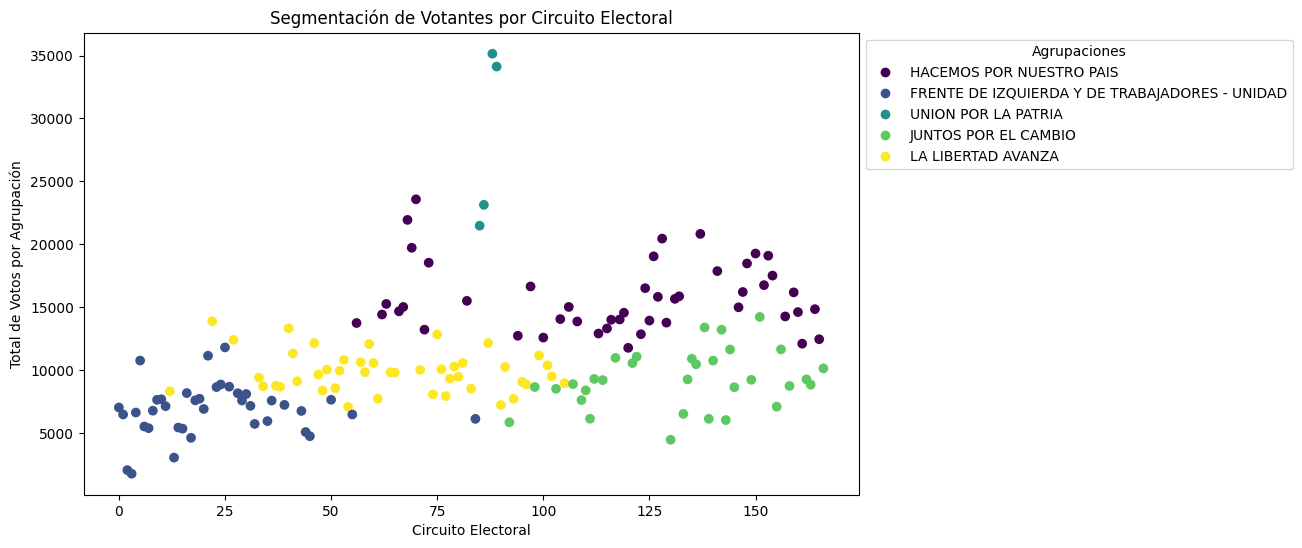

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'df' con la cantidad de votos por agrupación política por circuito electoral
# Asegúrate de seleccionar las columnas relevantes para la segmentación

# Selecciona las columnas relevantes (agrupaciones políticas)
columnas_agrupaciones = ['HACEMOS POR NUESTRO PAIS', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 'UNION POR LA PATRIA', 'JUNTOS POR EL CAMBIO', 'LA LIBERTAD AVANZA']
df_agrupaciones = resultado_final[['circuito_id'] + columnas_agrupaciones]

# Normalización de datos
scaler = StandardScaler()
df_segmentacion_norm = scaler.fit_transform(resultado_final)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4)
resultado_final['cluster'] = kmeans.fit_predict(df_segmentacion_norm)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_segmentacion.index, df_segmentacion[columnas_agrupaciones].sum(axis=1), c=df_segmentacion['cluster'], cmap='viridis')
plt.xlabel('Circuito Electoral')
plt.ylabel('Total de Votos por Agrupación')
plt.title('Segmentación de Votantes por Circuito Electoral')

legend_labels = columnas_agrupaciones
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Agrupaciones', bbox_to_anchor=(1, 1))

plt.show()

In [28]:
#Tenemos un dataframe que se llama df_concatenado2 en base al cual vamos a comparar si se suman los votos de jxc y 
#lla si superan los votos de uxp

df_comparacion = pd.DataFrame()
suma_votos = df_concatenado2['LA LIBERTAD AVANZA'] + df_concatenado2['JUNTOS POR EL CAMBIO']
df_comparacion['LA LIBERTAD AVANZA'] = df_concatenado2['LA LIBERTAD AVANZA']
df_comparacion['JUNTOS POR EL CAMBIO'] = df_concatenado2['JUNTOS POR EL CAMBIO']
df_comparacion['UNION POR LA PATRIA'] = df_concatenado2['UNION POR LA PATRIA']
df_comparacion['comparacion'] = np.where(suma_votos > df_concatenado2['UNION POR LA PATRIA'],'Mayor','Menor o Igual')

print(df_comparacion)

print("Queremos ver los resultados que fueron menores o iguales")
resultado_menor_igual = df_comparacion.loc[df_comparacion['comparacion'] == 'Menor o Igual']
print(resultado_menor_igual)

     LA LIBERTAD AVANZA  JUNTOS POR EL CAMBIO  UNION POR LA PATRIA  \
0                  1262                  2305                 2938   
1                  1187                  1918                 2867   
2                   571                  1090                  331   
3                   384                  1123                  221   
4                  1960                  1045                 3276   
..                  ...                   ...                  ...   
162                1677                  2876                 4041   
163                1564                  3173                 3514   
164                2528                  5976                 5257   
165                2223                  4487                 4807   
166                1896                  4133                 3337   

       comparacion  
0            Mayor  
1            Mayor  
2            Mayor  
3            Mayor  
4    Menor o Igual  
..             ...  
162         